In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ipywidgets import interactive
import ipywidgets as widgets
from wordcloud import WordCloud

In [4]:
df = pd.read_csv("genshin_data.csv", index_col=0)
df.head()

,name,association,rarity,weapon,element,month of birth,role,power_rating
0,Kamisato Ayaka,INAZUMA,5,Sword,Cryo,9,Main DPS,B
1,Jean,MONDSTADT,5,Sword,Anemo,3,Support,B
2,Lisa,MONDSTADT,4,Catalyst,Electro,6,Support,C
3,Barbara,MONDSTADT,4,Catalyst,Hydro,7,Support,C
4,Kaeya,MONDSTADT,4,Sword,Cryo,11,Sub DPS,C


In [5]:
df[df.isnull().any(axis=1)]

,name,association,rarity,weapon,element,month of birth,role,power_rating
46,Aloy,NaN,4,Bow,Cryo,4,Sub DPS,D
96,Escoffier,FONTAINE,5,Polearm,Cryo,6,NaN,NaN
97,Ifa,NATLAN,4,Catalyst,Anemo,3,NaN,NaN
98,Skirk,SCOURGE,5,Sword,Cryo,1,NaN,NaN
99,Dahlia,MONDSTADT,4,Sword,Hydro,1,NaN,NaN
100,Traveler (Dendro),NaN,5,Sword,Dendro,0,Support,C
101,Traveler (Pyro),NaN,5,Sword,Pyro,0,Support,C
102,Traveler (Anemo),NaN,5,Sword,Anemo,0,Sub DPS,D
103,Traveler (Electro),NaN,5,Sword,Electro,0,Support,D
104,Traveler (Geo),NaN,5,Sword,Geo,0,Sub DPS,D


In [6]:
df["association"] = df["association"].fillna("")
df["role"] = df["role"].fillna("")
df["power_rating"] = df["power_rating"].fillna("")

df[df.isnull().any(axis=1)]

,name,association,rarity,weapon,element,month of birth,role,power_rating


In [7]:
def plot_image(image, figsize=(8,6)):
    plt.figure(figsize=figsize)
    plt.imshow(image)

In [8]:
# Облако слов
word_colors = {
    "mondstadt": "green",
    "liyue": "yellow",
    "inazuma":	"blue",
    "sumeru": "red",
    "fontaine": "black",
    "natlan": "white",
    "snezhnaya": "purple",

    "anemo": "green",
    "geo": "yellow",
    "electro":	"blue",
    "dendro": "red",
    "hydro": "black",
    "pyro": "white",
    "cryo": "purple",
}


def color(word, **kwargs):
    return word_colors.get(word.lower(), "black")

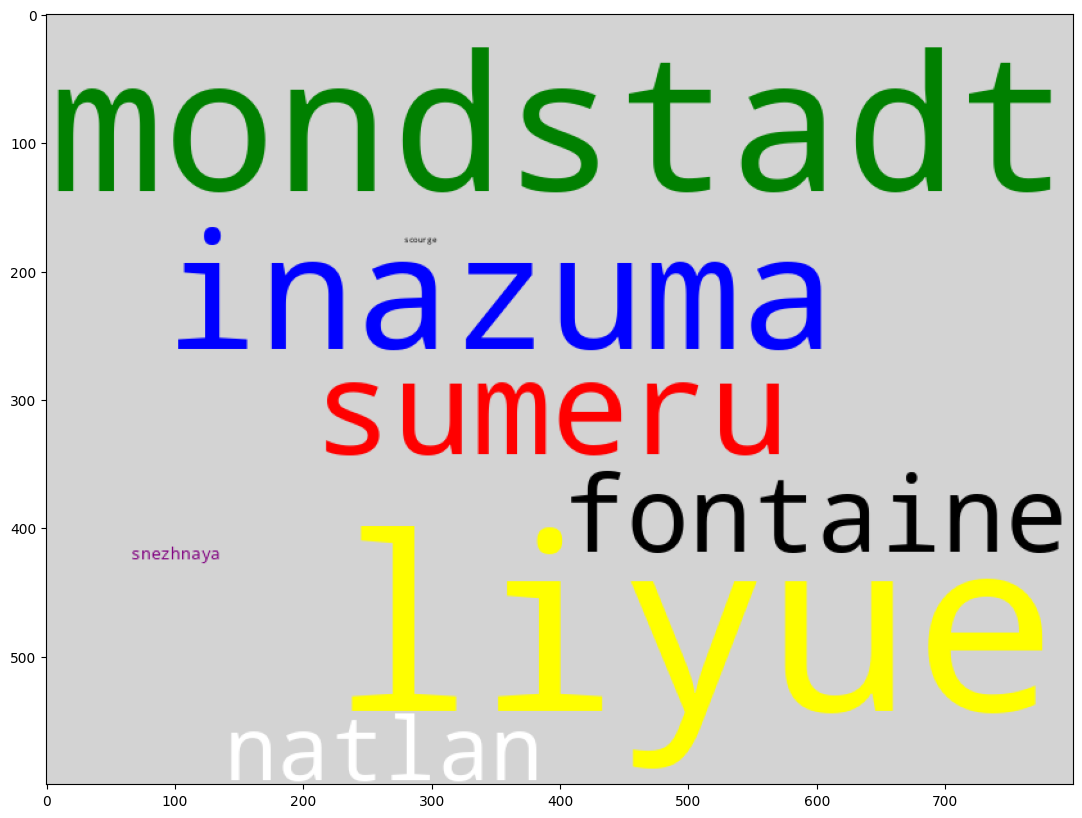

In [11]:
# Облако слов по принадлежности персонажа к стране
wordcloud = WordCloud(background_color="lightgray",
                      color_func=color,
                      width=800,
                      height=600,
                      prefer_horizontal=1,
                      relative_scaling=1,
                      collocations=False).generate(" ".join(df["association"].fillna("").str.lower()))

plot_image(wordcloud, (20,10))

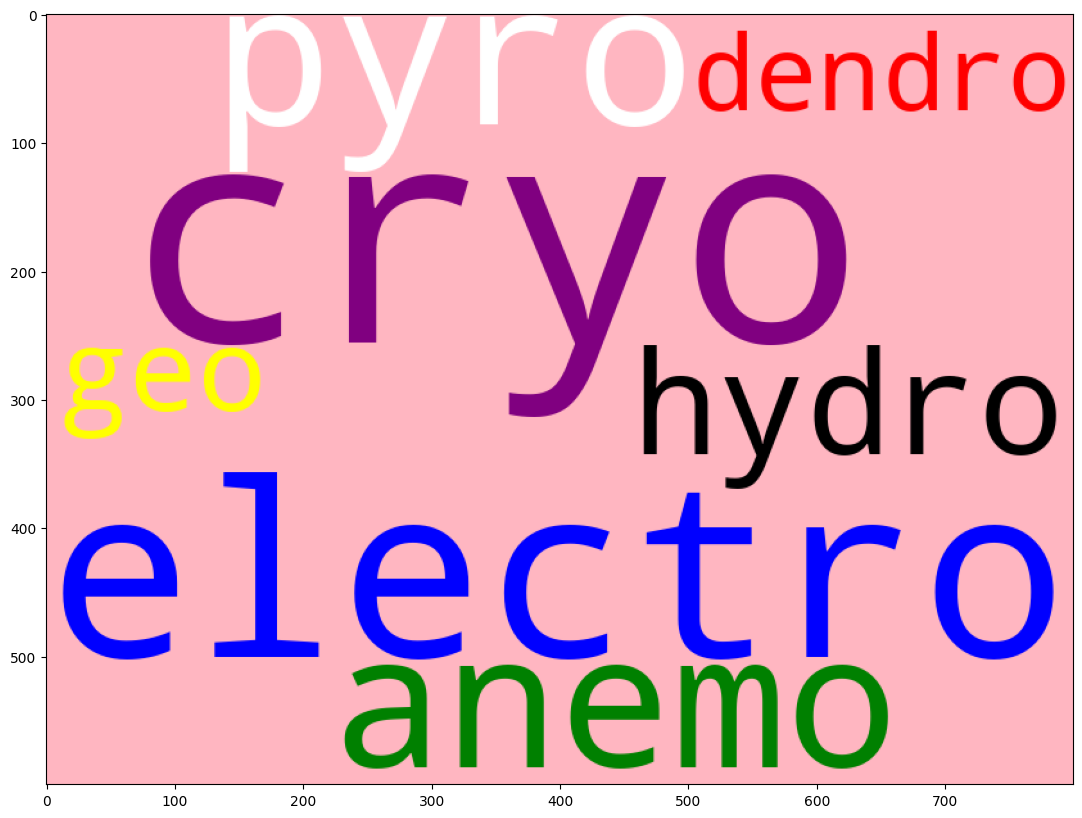

In [13]:
# Облако слов по элементам
wordcloud = WordCloud(background_color="lightpink",
                      color_func=color,
                      width=800,
                      height=600,
                      prefer_horizontal=1,
                      relative_scaling=1,
                      collocations=False).generate(" ".join(df["element"].str.lower()))

plot_image(wordcloud, (20, 10))

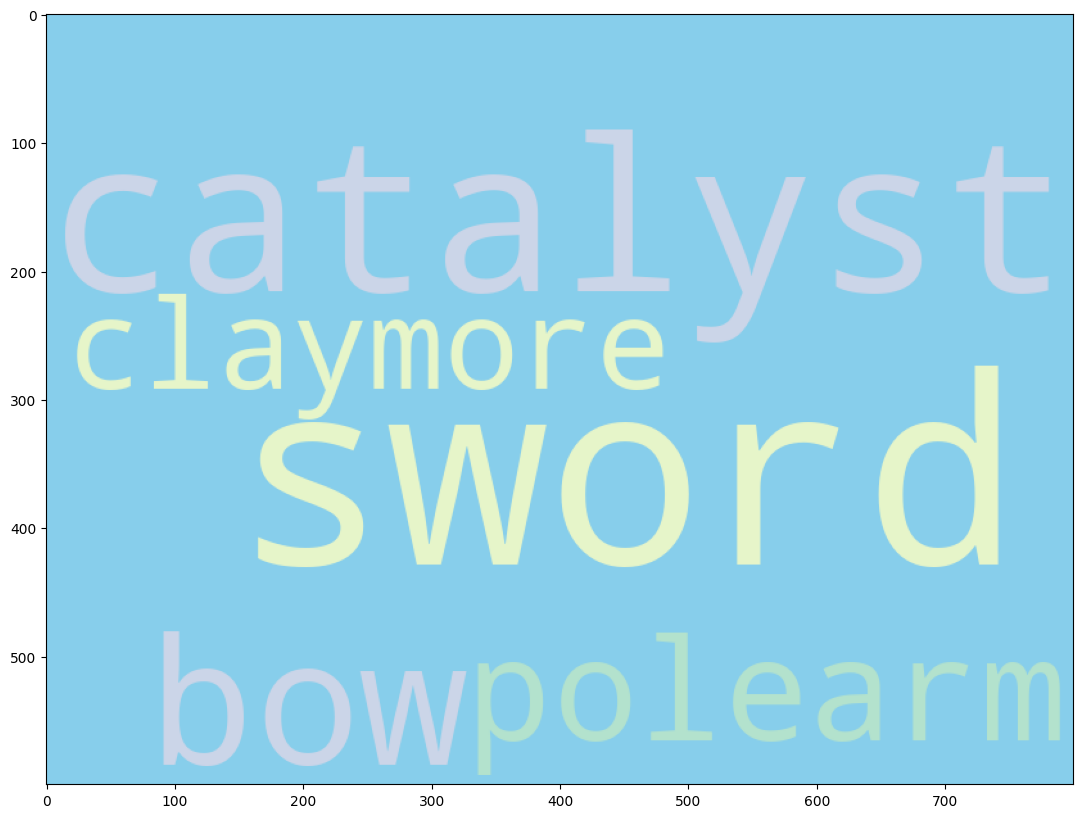

In [14]:
# Облако слов по оружию
wordcloud = WordCloud(background_color="skyblue",
                      colormap="Pastel2",
                      width=800,
                      height=600,
                      prefer_horizontal=1,
                      relative_scaling=1,
                      collocations=False).generate(" ".join(df["weapon"].str.lower()))

plot_image(wordcloud, (20, 10))

In [24]:
word_colors['scourge'] = '#FF5733'

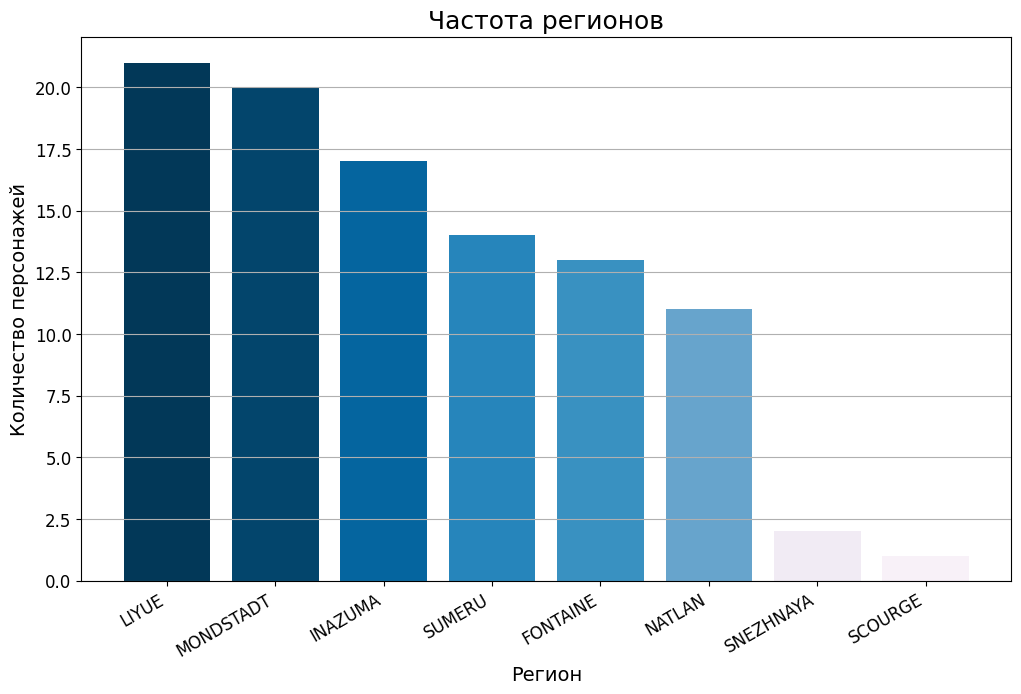

In [26]:
#@title Столбчатые диаграммы
# Диаграмма частоты регионов
cmap = plt.get_cmap("PuBu")

plt.figure(figsize=(12, 8))
plt.bar(regions.index, regions.values, color=[
        cmap(i / max(regions.values)) for i in regions.values])

plt.title("Частота регионов", fontsize=18)
plt.xlabel("Регион", fontsize=14)
plt.ylabel("Количество персонажей", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.gcf().autofmt_xdate()
plt.grid(axis="y")
plt.show()

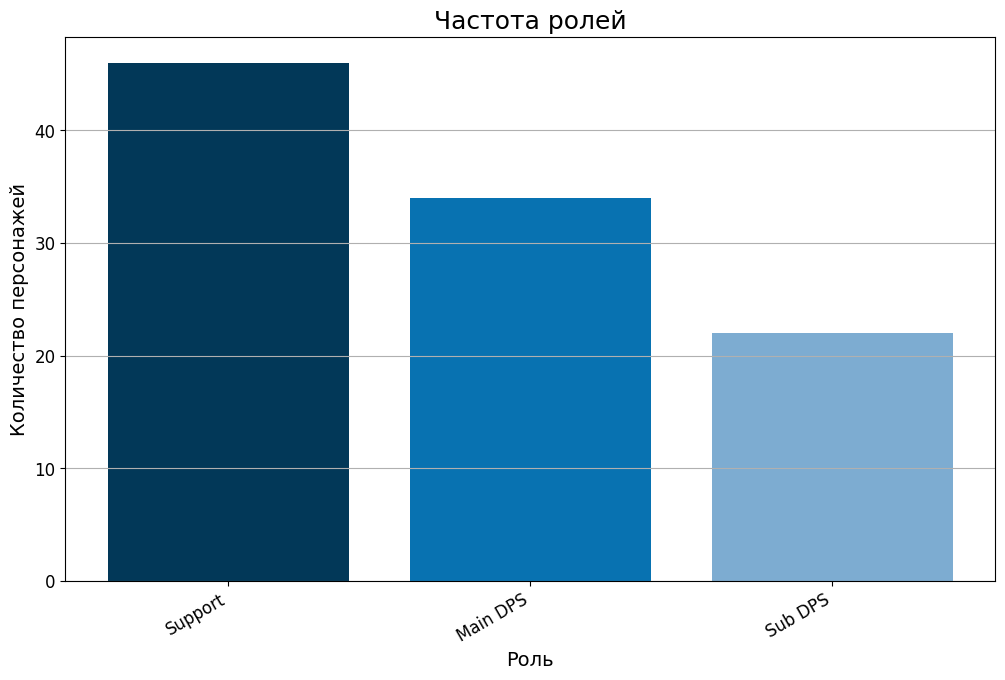

In [27]:
#Диаграмма ролей в отряде
roles = df[df["role"] != ""].value_counts("role")

cmap = plt.get_cmap("PuBu")
plt.figure(figsize=(12, 8))
plt.bar(roles.index, roles.values, color=[
        cmap(i / max(roles.values)) for i in roles.values])

plt.title("Частота ролей", fontsize=18)
plt.xlabel("Роль", fontsize=14)
plt.ylabel("Количество персонажей", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.gcf().autofmt_xdate()
plt.grid(axis="y")
plt.show()

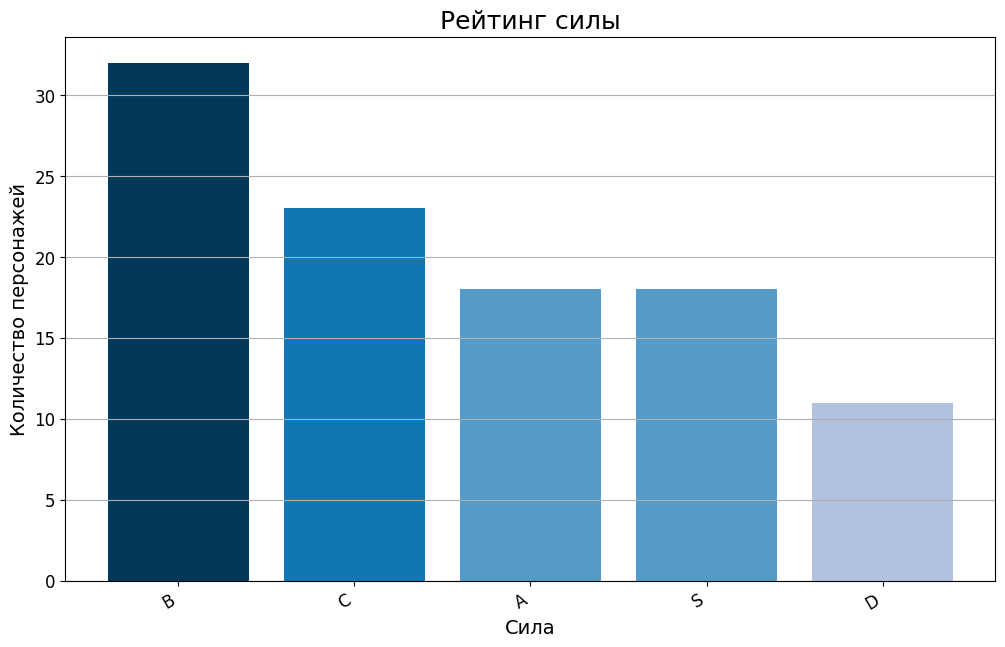

In [28]:
# Диаграмма силы персонажей
power = df[df["power_rating"] != ""].value_counts("power_rating")

cmap = plt.get_cmap("PuBu")
plt.figure(figsize=(12, 8))
plt.bar(power.index, power.values, color=[
        cmap(i / max(power.values)) for i in power.values])

plt.title("Рейтинг силы", fontsize=18)
plt.xlabel("Сила", fontsize=14)
plt.ylabel("Количество персонажей", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.gcf().autofmt_xdate()
plt.grid(axis="y")
plt.show()

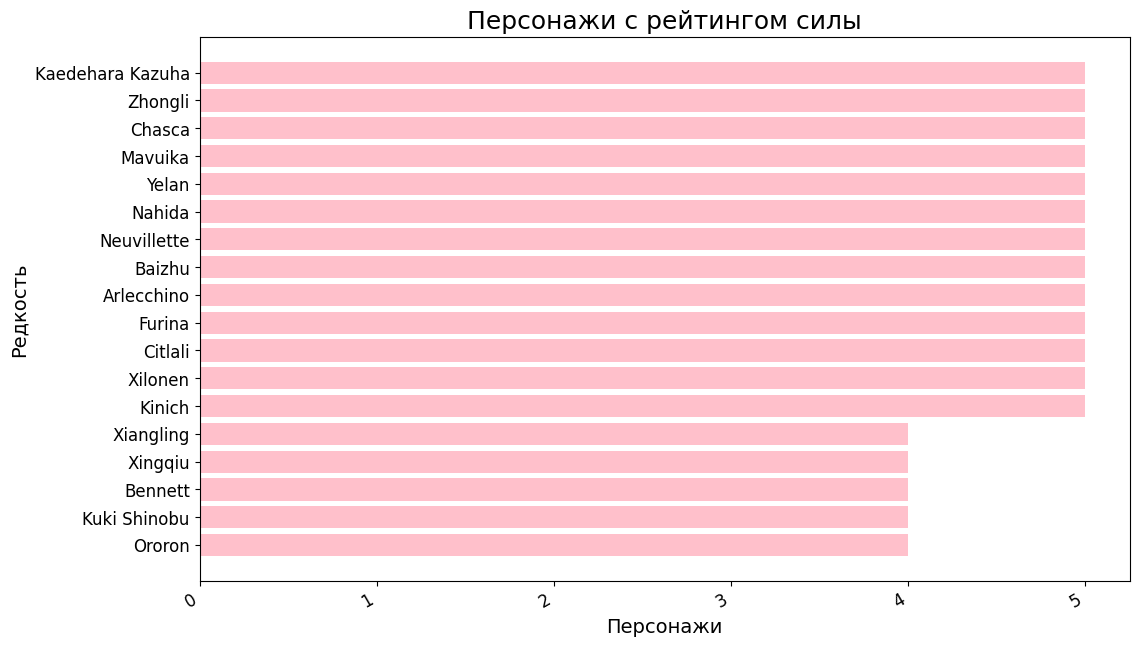

In [31]:
# Самые сильные персонажи
df_s_rank = df[df["power_rating"] == "S"].sort_values(
    by="rarity", ascending=False)

cmap = plt.get_cmap("PuBu")

plt.figure(figsize=(12, 8))
plt.barh(df_s_rank["name"], df_s_rank["rarity"], color="pink")

plt.title("Персонажи с рейтингом силы", fontsize=18)
plt.xlabel("Персонажи", fontsize=14)
plt.ylabel("Редкость", fontsize=14)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)

plt.gcf().autofmt_xdate()
plt.gca().invert_yaxis()

plt.show()

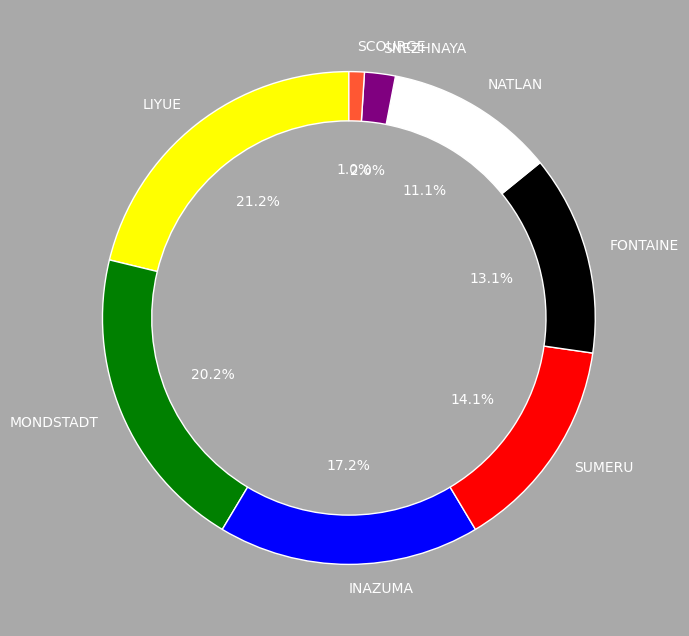

In [46]:
# @title Круговая диаграмма
# Диаграмма регионов
regions = df[df["association"] != ""].value_counts("association")

colors = [word_colors[reg.lower()] for reg in regions.index]

plt.figure(figsize=(16,8))
regions.plot.pie(
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    legend=False,
    wedgeprops=dict(width=0.2, edgecolor="w"),
    textprops={"fontsize": 10, "color": "white"}
)

plt.gcf().set_facecolor("darkgray")
plt.axis("off");

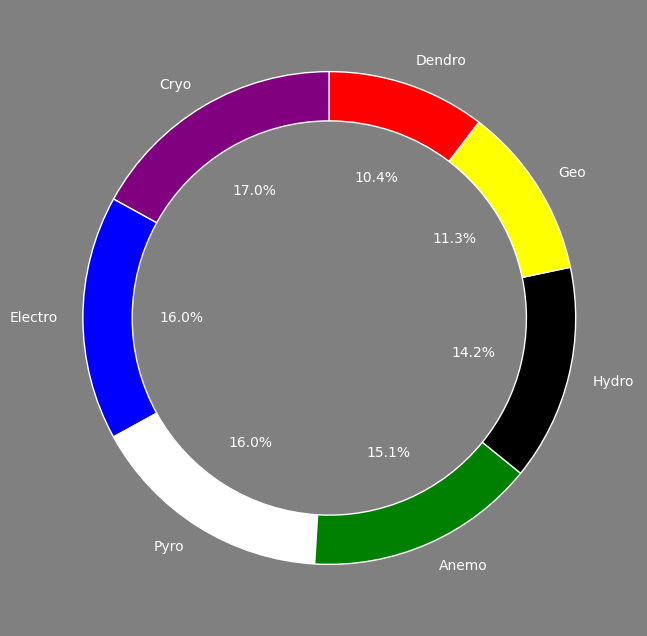

In [48]:
# Диаграмма элементов
elements = df["element"].value_counts()

colors = [word_colors[elem.lower()] for elem in elements.index]

plt.figure(figsize=(16, 8))
elements.plot.pie(
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    legend=False,
    wedgeprops=dict(width=0.2, edgecolor="w"),
    textprops={"fontsize": 10, "color": "white"}
)

plt.gcf().set_facecolor("gray")
plt.axis("off");

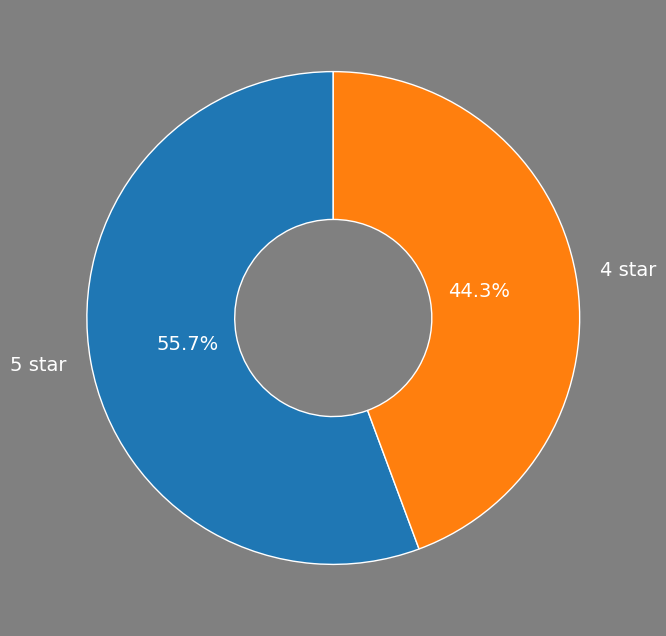

In [49]:
# Диаграмма редкости
grouped_rarities = pd.cut(df["rarity"], [0,4,5], labels=["4 star", "5 star"]).value_counts()

plt.figure(figsize=(16, 8))
grouped_rarities.plot.pie(
    autopct="%1.1f%%",
    startangle=90,
    legend=False,
    wedgeprops=dict(width=0.6, edgecolor="w"),
    textprops={"fontsize": 14, "color": "white"})

plt.gcf().set_facecolor("gray")
plt.axis("off");

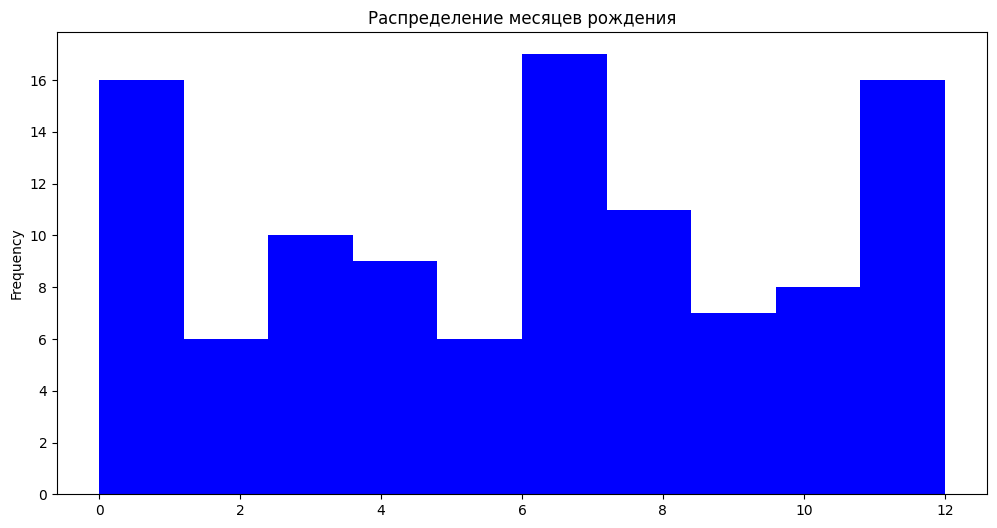

In [50]:
# @title Гистограммы
# Гистограмма распределения месяцев рождения
df["month of birth"].plot(
    kind="hist",
    figsize=(12, 6),
    color="blue",
    title="Распределение месяцев рождения",
    bins=int(len(df["month of birth"])**0.5));

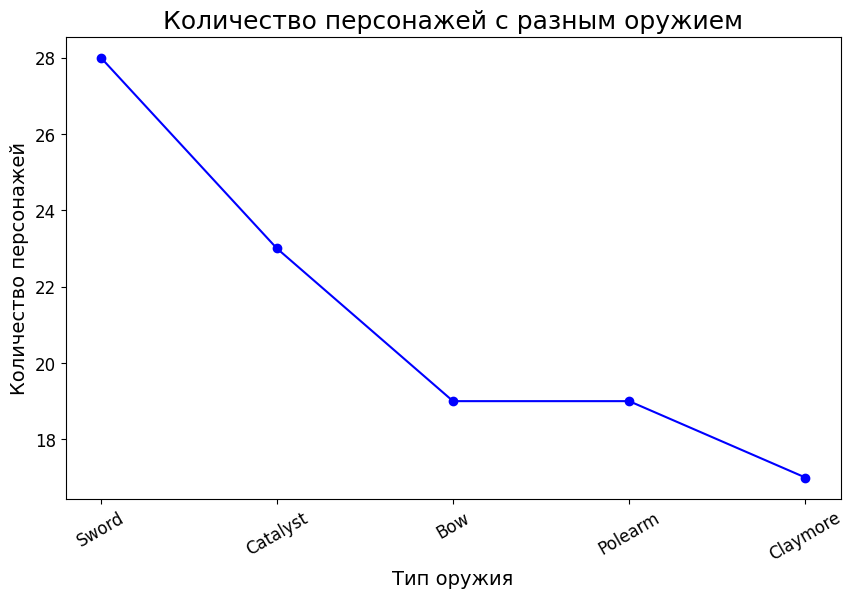

In [51]:
# @title Линейные графики
# График оружия
weapon_counts = df["weapon"].value_counts()

plt.figure(figsize=(10, 6))
plt.plot(weapon_counts.index, weapon_counts.values,
         marker="o", linestyle="-", color="b")

plt.title("Количество персонажей с разным оружием", fontsize=18)
plt.xlabel("Тип оружия", fontsize=14)
plt.ylabel("Количество персонажей", fontsize=14)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)

plt.show()

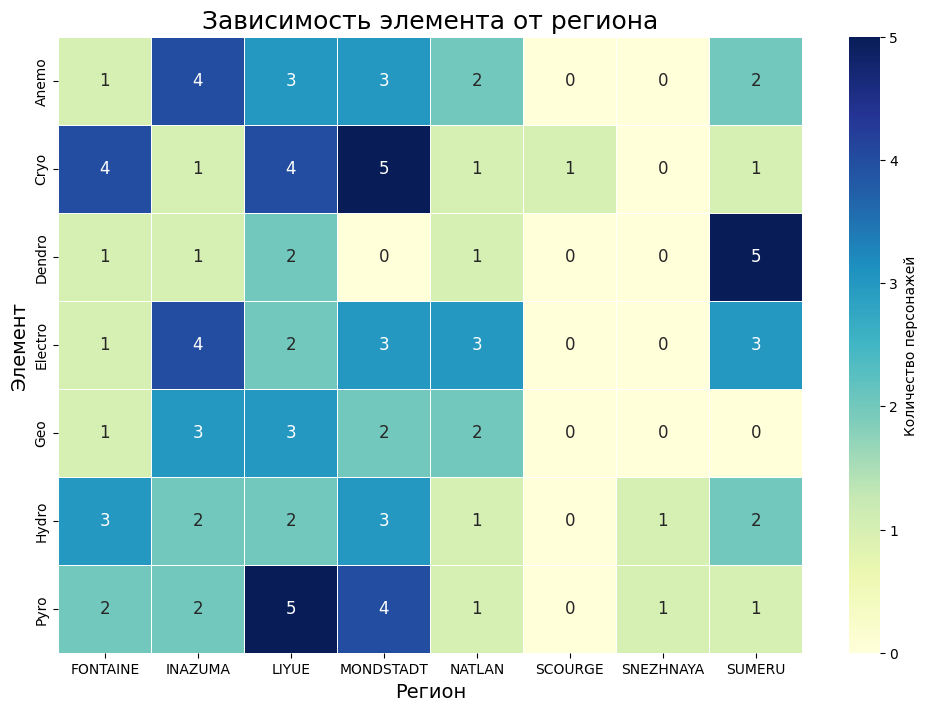

In [54]:
# @title Тепловые карты
# Тепловая карта зависимости элемента от регионаэ
sorted_df = df[df["association"] != ""]
region_element_counts = sorted_df.groupby(
    ["association", "element"]).size().reset_index(name="count")

pivot_table = region_element_counts.pivot_table(
    index="element", columns="association", values="count", fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_table,
    annot=True,  # Отображаем числа на ячейках
    cmap="YlGnBu",
    fmt=".0f",  # Формат чисел
    linewidths=0.5,
    cbar_kws={"label": "Количество персонажей"},
    annot_kws={"size": 12}
)

plt.title(
    "Зависимость элемента от региона", fontsize=18)
plt.xlabel("Регион", fontsize=14)
plt.ylabel("Элемент", fontsize=14)

plt.show()

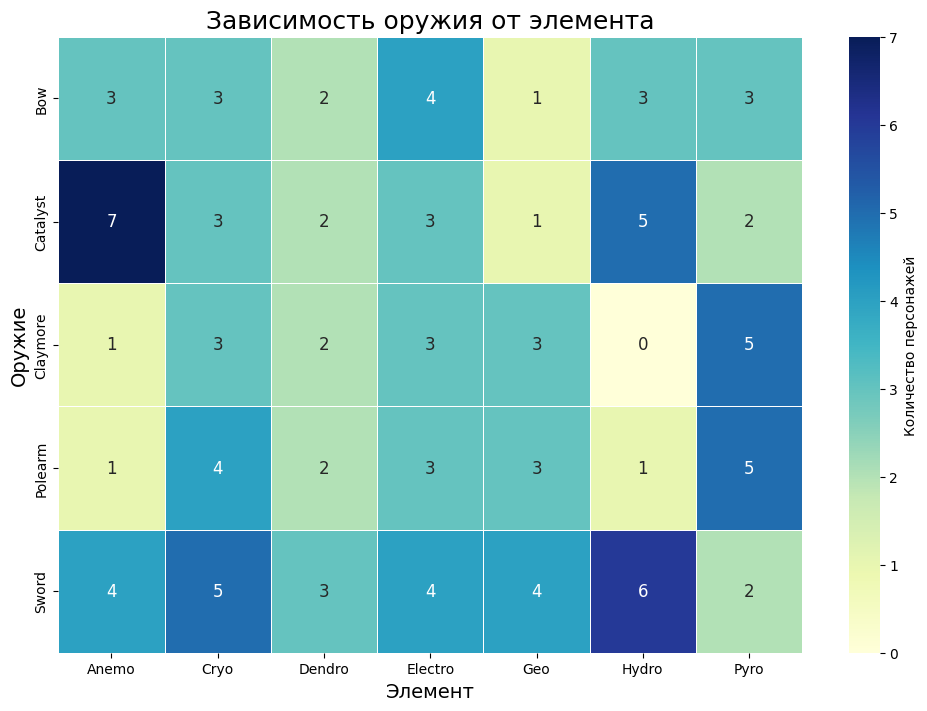

In [55]:
# Тепловая карта зависимости оружия от элемента
weapon_element_counts = df.groupby(["element", "weapon"]).size().reset_index(name="count")

pivot_table = weapon_element_counts.pivot_table( index="weapon", columns="element", values="count", fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_table,
    annot=True,  # Отображаем числа на ячейках
    cmap="YlGnBu",
    fmt=".0f",  # Формат чисел
    linewidths=0.5,
    cbar_kws={"label": "Количество персонажей"},
    annot_kws={"size": 12})

plt.title( "Зависимость оружия от элемента", fontsize=18)
plt.xlabel("Элемент", fontsize=14)
plt.ylabel("Оружие", fontsize=14)
plt.show()

In [71]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from matplotlib.patches import Patch
from ipywidgets import interactive

power_mapping = {"S": 6, "A": 5, "B": 4, "C": 3, "D": 2, "": 0}

power_mapping_reverse = {v: k for k, v in power_mapping.items()}

def plot_character_comparison_improved(selected_characters, sort_by='rarity'):
    if not selected_characters:
        print("Пожалуйста, выберите хотя бы одного персонажа")
        return

    filtered_df = df[df["name"].isin(selected_characters)].copy()

    if filtered_df.empty:
        print("Нет данных для выбранных персонажей")
        return

    filtered_df['power_numeric'] = filtered_df['power_rating'].map(power_mapping)

    filtered_df = filtered_df.sort_values(by=sort_by, ascending=False)

    rarity_cmap = plt.cm.YlOrRd
    power_cmap = plt.cm.viridis

    rarity_colors = {}
    for r in filtered_df['rarity'].unique():
        rarity_colors[r] = mcolors.to_hex(rarity_cmap(0.2 + (r - 3) / 3))

    power_colors = {}
    for p in filtered_df['power_numeric'].unique():
        if p > 0:
            power_colors[p] = mcolors.to_hex(power_cmap(0.2 + (p - 1) / 5))
        else:
            power_colors[p] = 'lightgray'

    fig, ax = plt.subplots(2, 1, figsize=(14, 12), facecolor='#f9f9f9')
    fig.suptitle('Сравнение персонажей', fontsize=20, fontweight='bold', y=0.98)

    rarity_bars = ax[0].bar(
        filtered_df["name"],
        filtered_df["rarity"],
        color=[rarity_colors[r] for r in filtered_df["rarity"]],
        edgecolor='black',
        linewidth=1,
        alpha=0.8
    )

    for i, (idx, row) in enumerate(filtered_df.iterrows()):
        for star in range(int(row['rarity'])):
            ax[0].text(
                i,
                3.1 + star * 0.5,
                '★',
                ha='center',
                va='center',
                fontsize=15,
                color='gold',
                fontweight='bold'
            )

    ax[0].set_title("Рейтинг редкости персонажей", fontsize=16, pad=20)
    ax[0].set_ylabel("Звезды редкости", fontsize=14)
    ax[0].set_xlabel("", fontsize=1)
    ax[0].set_ylim(2.5, 6.5)
    ax[0].set_yticks(range(3, 7))
    ax[0].tick_params(axis='x', rotation=45, labelsize=12)
    ax[0].tick_params(axis='y', labelsize=12)

    ax[0].grid(axis='y', linestyle='--', alpha=0.3)

    for i, v in enumerate(filtered_df["rarity"]):
        ax[0].text(i, v + 0.2, str(int(v))+'★', ha='center', fontweight='bold')

    power_bars = ax[1].bar(
        filtered_df["name"],
        filtered_df['power_numeric'],
        color=[power_colors.get(p, 'gray') for p in filtered_df['power_numeric']],
        edgecolor='black',
        linewidth=1,
        alpha=0.8
    )

    for i, (idx, row) in enumerate(filtered_df.iterrows()):
        power_rating = row['power_rating']
        if power_rating:
            ax[1].text(
                i,
                row['power_numeric'] / 2,
                power_rating,
                ha='center',
                va='center',
                fontsize=18,
                fontweight='bold',
                color='white'
            )

    ax[1].set_title("Рейтинг мощности персонажей", fontsize=16, pad=20)
    ax[1].set_ylabel("Числовое значение мощности", fontsize=14)
    ax[1].set_xlabel("Персонаж", fontsize=14, labelpad=10)
    ax[1].set_ylim(0, 7)
    ax[1].tick_params(axis='x', rotation=45, labelsize=12)
    ax[1].tick_params(axis='y', labelsize=12)

    ax[1].grid(axis='y', linestyle='--', alpha=0.3)

    for i, v in enumerate(filtered_df['power_numeric']):
        if v > 0:
            ax[1].text(i, v + 0.2, power_mapping_reverse.get(v, ""), ha='center', fontweight='bold')

    rarity_legend_elements = [
        Patch(facecolor=rarity_colors[r], edgecolor='black', label=f'{r}★')
        for r in sorted(rarity_colors.keys(), reverse=True)
    ]
    ax[0].legend(
        handles=rarity_legend_elements,
        title="Редкость",
        loc='upper right',
        fontsize=10,
        title_fontsize=12
    )

    power_legend_elements = [
        Patch(facecolor=power_colors[p], edgecolor='black', label=f'{power_mapping_reverse.get(p, "")}')
        for p in sorted(power_colors.keys(), reverse=True) if p > 0
    ]
    ax[1].legend(
        handles=power_legend_elements,
        title="Рейтинг мощности",
        loc='upper right',
        fontsize=10,
        title_fontsize=12
    )

    plt.tight_layout()
    fig.subplots_adjust(top=0.92, bottom=0.1)

    sort_text = "редкости" if sort_by == 'rarity' else "мощности"
    fig.text(
        0.02, 0.02,
        f"Отсортировано по {sort_text}",
        fontsize=10,
        style='italic'
    )

    fig.text(
        0.98, 0.02,
        f"Выбрано персонажей: {len(selected_characters)}",
        fontsize=10,
        ha='right',
        style='italic'
    )

    plt.show()

def create_character_widget():
    character_selector = widgets.SelectMultiple(
        options=sorted(df['name'].tolist()),
        value=['Kamisato Ayaka', 'Jean'],
        description='Персонажи:',
        disabled=False,
        layout=widgets.Layout(width='50%', height='200px')
    )

    search_input = widgets.Text(
        value='',
        placeholder='Поиск персонажей...',
        description='Поиск:',
        disabled=False,
        layout=widgets.Layout(width='50%')
    )

    sort_selector = widgets.Dropdown(
        options=[
            ('По редкости', 'rarity'),
            ('По мощности', 'power_rating')
        ],
        value='rarity',
        description='Сортировка:',
        disabled=False,
        layout=widgets.Layout(width='50%')
    )

    def filter_characters(change):
        search_term = change['new'].lower()
        if search_term:
            filtered_options = [name for name in df['name'] if search_term in name.lower()]
            character_selector.options = filtered_options
        else:
            character_selector.options = sorted(df['name'].tolist())

    search_input.observe(filter_characters, names='value')

    reset_button = widgets.Button(
        description='Сбросить выбор',
        disabled=False,
        button_style='',
        tooltip='Нажмите, чтобы сбросить выбор персонажей',
        icon='refresh'
    )

    def reset_selection(b):
        character_selector.value = []
        search_input.value = ''

    reset_button.on_click(reset_selection)

    select_all_button = widgets.Button(
        description='Выбрать всех',
        disabled=False,
        button_style='',
        tooltip='Нажмите, чтобы выбрать всех персонажей',
        icon='check'
    )

    def select_all(b):
        character_selector.value = list(character_selector.options)

    select_all_button.on_click(select_all)

    rarity_buttons = []
    for r in sorted(df['rarity'].unique()):
        btn = widgets.Button(
            description=f'{int(r)}★',
            tooltip=f'Выбрать всех {int(r)}★ персонажей',
            layout=widgets.Layout(width='60px')
        )

        def create_rarity_filter(rarity):
            def filter_by_rarity(b):
                rarity_chars = df[df['rarity'] == rarity]['name'].tolist()
                character_selector.value = rarity_chars
            return filter_by_rarity

        btn.on_click(create_rarity_filter(r))
        rarity_buttons.append(btn)

    rarity_filter_box = widgets.HBox(
        children=[widgets.Label('Фильтр по редкости:')] + rarity_buttons,
        layout=widgets.Layout(margin='10px 0px')
    )

    info_label = widgets.HTML(
        value='<span style="font-style:italic">Выберите персонажей для сравнения</span>'
    )

    top_widgets = widgets.HBox([search_input, sort_selector])
    control_buttons = widgets.HBox([reset_button, select_all_button])

    widgets_box = widgets.VBox([
        info_label,
        top_widgets,
        character_selector,
        control_buttons,
        rarity_filter_box
    ])

    interactive_plot = interactive(
        plot_character_comparison_improved,
        selected_characters=character_selector,
        sort_by=sort_selector
    )

    output = interactive_plot.children[-1]
    output.layout.height = '600px'
    final_widget = widgets.VBox([widgets_box, output])

    return final_widget

visualization_widget = create_character_widget()
display(visualization_widget)

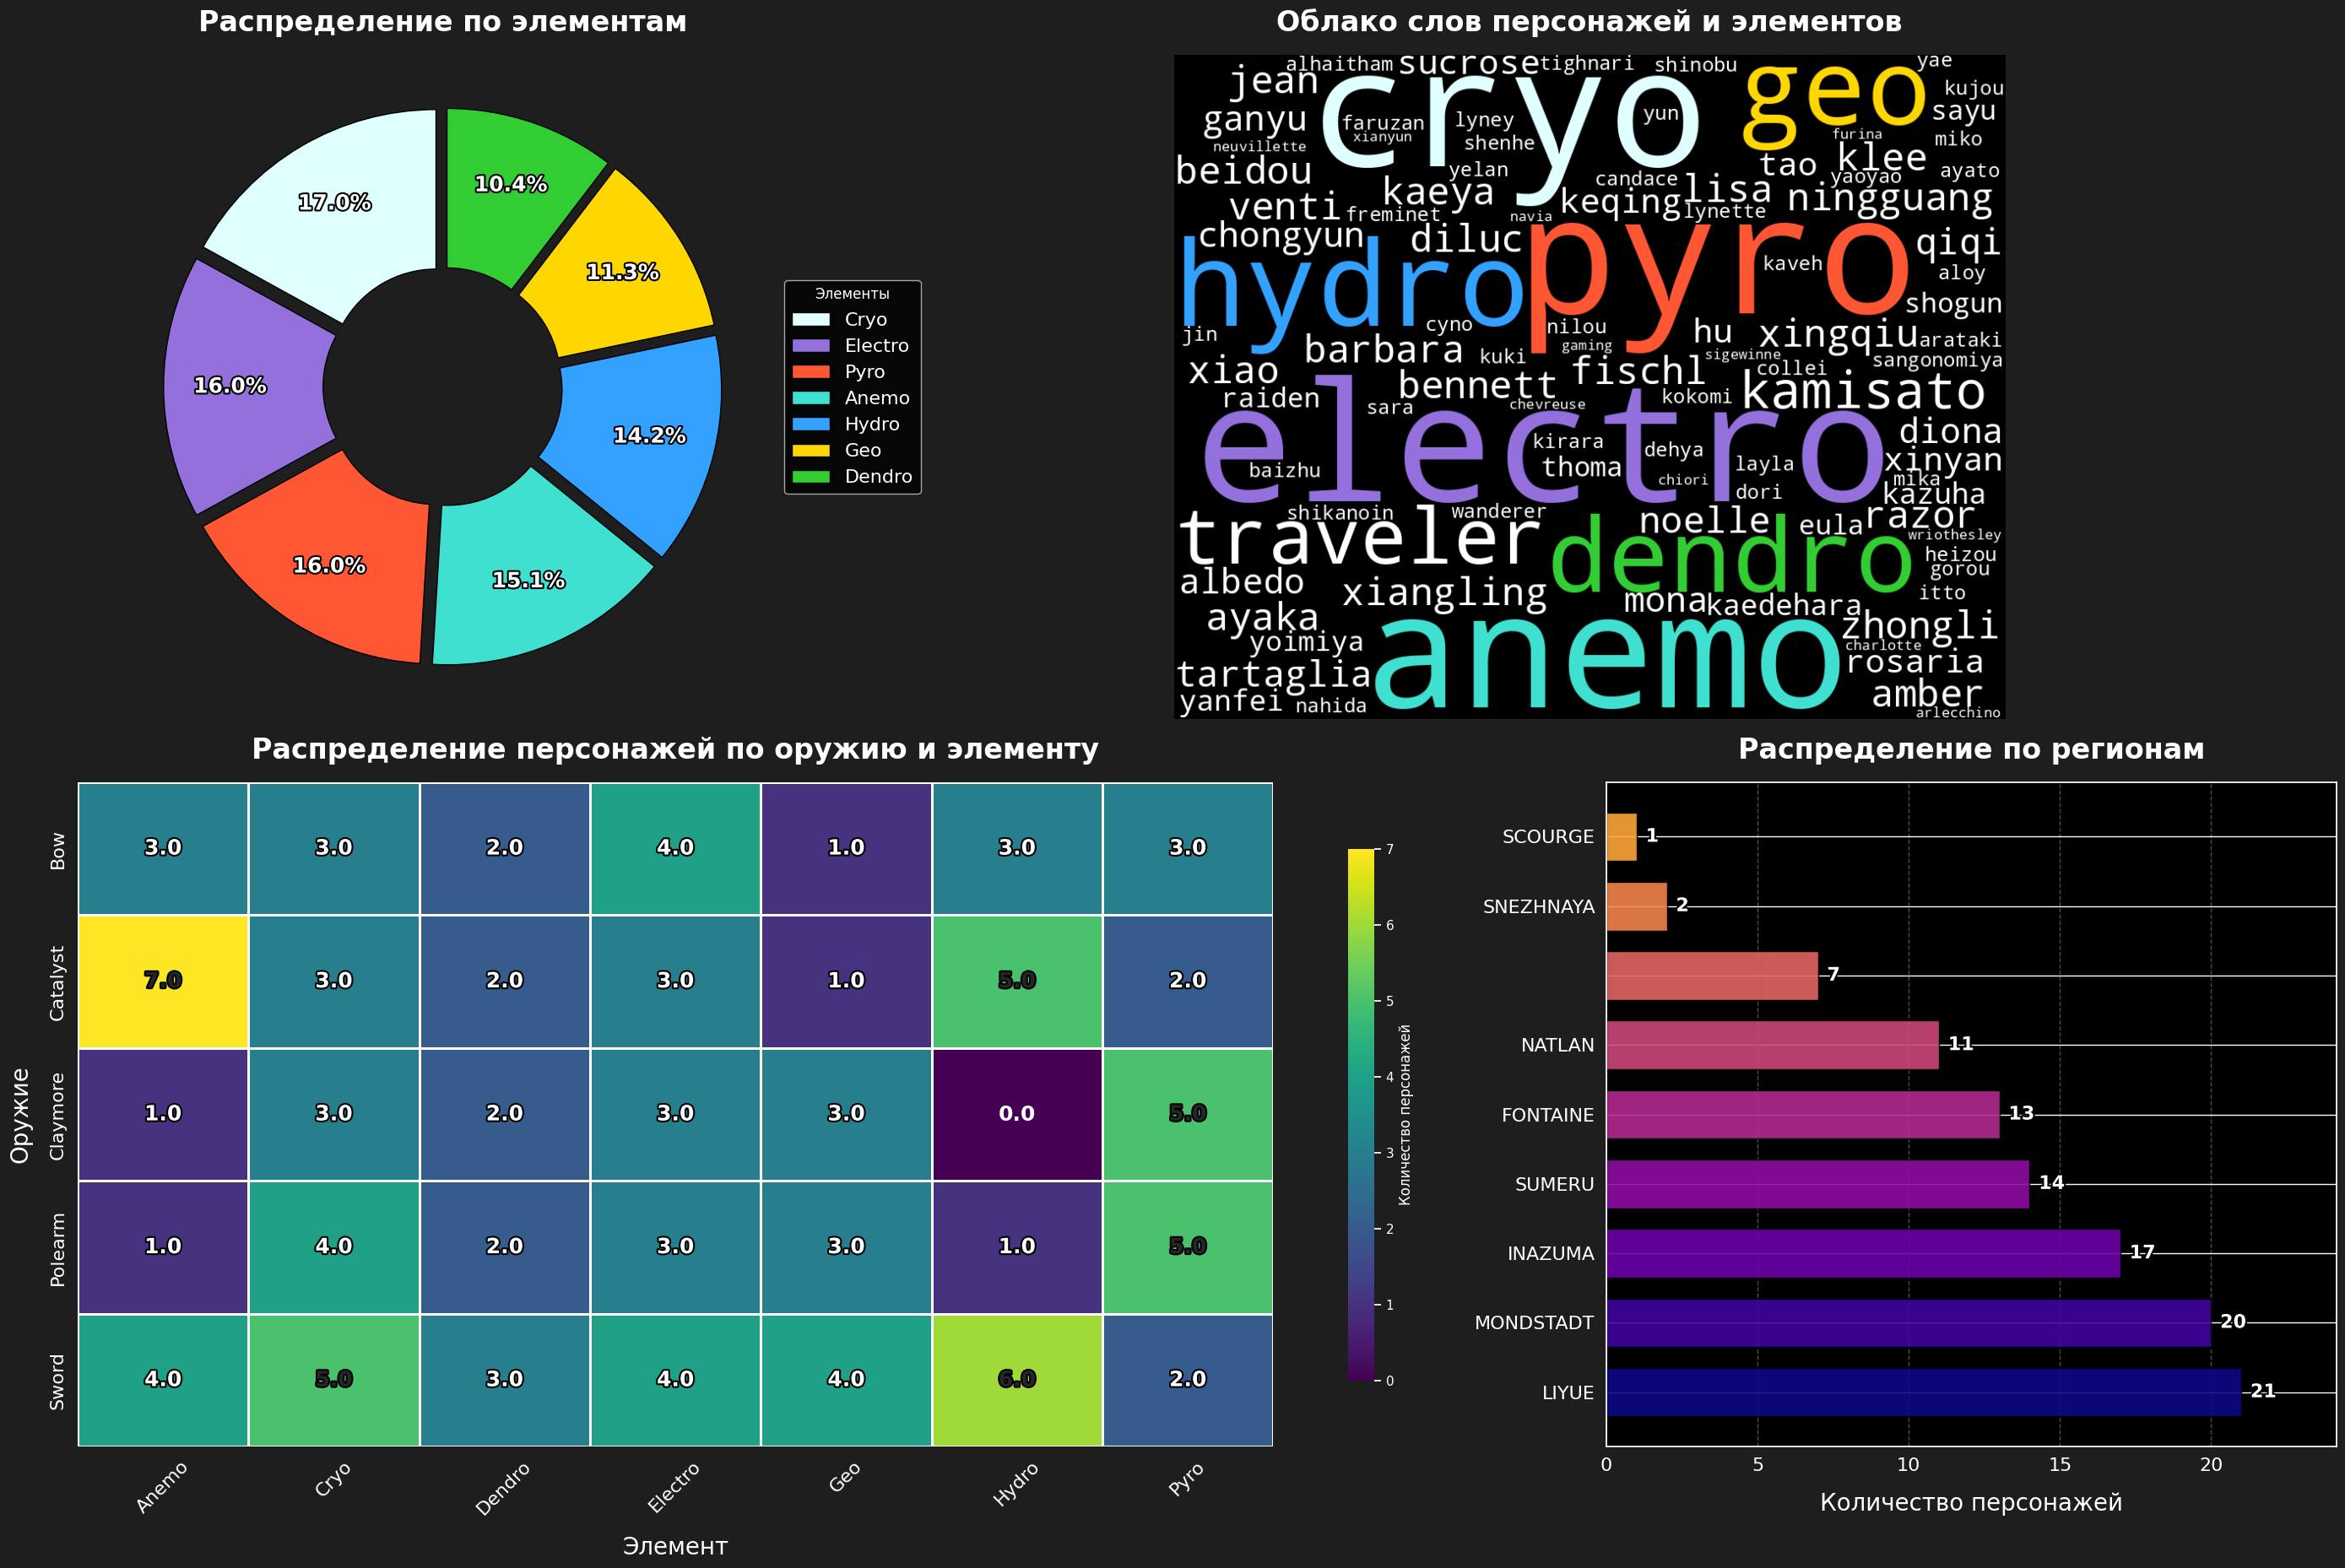

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from matplotlib.gridspec import GridSpec
import matplotlib.patheffects as PathEffects

plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(28, 20))
gs = GridSpec(2, 3, figure=fig, width_ratios=[1, 1, 1], height_ratios=[1, 1])

plt.style.use('dark_background')
color_palette = sns.color_palette("viridis", 10)
custom_cmap = sns.color_palette("coolwarm", as_cmap=True)
accent_color = "#FF9671"

word_colors_enhanced = {
    'pyro': '#FF5733',
    'hydro': '#33A1FF',
    'anemo': '#40E0D0',
    'electro': '#9370DB',
    'dendro': '#32CD32',
    'cryo': '#E0FFFF',
    'geo': '#FFD700',
}

ax1 = fig.add_subplot(gs[0, 0])
elements = df["element"].value_counts()
colors = [word_colors_enhanced[elem.lower()] for elem in elements.index]

wedges, texts, autotexts = ax1.pie(
    elements,
    labels=None,
    autopct=lambda pct: f"{pct:.1f}%" if pct > 5 else "",
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.6, edgecolor="black", linewidth=1),
    pctdistance=0.75,
    explode=[0.05] * len(elements)
)

for autotext in autotexts:
    autotext.set_fontsize(18)
    autotext.set_fontweight('bold')
    autotext.set_color('white')
    autotext.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='black')])

ax1.legend(
    wedges,
    elements.index,
    title="Элементы",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=16
)

ax1.set_title('Распределение по элементам', fontsize=24, pad=20, fontweight='bold')

ax2 = fig.add_subplot(gs[0, 1:])
def color_func(word, *args, **kwargs):
    return word_colors_enhanced.get(word.lower(), "white")

wordcloud = WordCloud(
    background_color="black",
    color_func=color_func,
    width=1000,
    height=800,
    max_words=100,
    contour_width=1,
    contour_color='white',
    prefer_horizontal=1.0,
    font_path=None,
    min_font_size=10,
    max_font_size=200,
    random_state=42
).generate(" ".join(df["element"].str.lower() + " " + df["name"].str.lower()))

ax2.imshow(wordcloud, interpolation="bilinear")
ax2.axis("off")
ax2.set_title('Облако слов персонажей и элементов', fontsize=24, pad=20, fontweight='bold')

ax3 = fig.add_subplot(gs[1, :2])
weapon_element_counts = df.groupby(["element", "weapon"]).size().reset_index(name="count")
pivot_table = weapon_element_counts.pivot_table(
    index="weapon", columns="element", values="count", fill_value=0
)

normalized_pivot = pivot_table.div(pivot_table.max(axis=1), axis=0)

heatmap = sns.heatmap(
    pivot_table,
    annot=True,
    cmap="viridis",
    ax=ax3,
    linewidths=1,
    cbar_kws={"label": "Количество персонажей", "shrink": 0.8, "pad": 0.05},
    annot_kws={"size": 18, "weight": "bold"},
    fmt=".1f"
)

for t in heatmap.texts:
    if float(t.get_text()) > 0:
        t.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='black')])

ax3.set_xlabel('Элемент', fontsize=20, labelpad=15)
ax3.set_ylabel('Оружие', fontsize=20, labelpad=15)
ax3.set_title('Распределение персонажей по оружию и элементу', fontsize=24, pad=20, fontweight='bold')

ax3.tick_params(axis='x', labelsize=16, rotation=45)
ax3.tick_params(axis='y', labelsize=16)

ax4 = fig.add_subplot(gs[1, 2])
regions = df["association"].value_counts().sort_values(ascending=False)

colors = plt.cm.plasma(np.linspace(0, 0.8, len(regions)))

bars = ax4.barh(
    regions.index,
    regions.values,
    color=colors,
    height=0.7,
    edgecolor='black',
    linewidth=1,
    alpha=0.9
)

for i, (value, name) in enumerate(zip(regions.values, regions.index)):
    ax4.text(
        value + 0.3,
        i,
        str(value),
        ha='left',
        va='center',
        fontsize=16,
        fontweight='bold',
        color='white',
        path_effects=[PathEffects.withStroke(linewidth=3, foreground='black')]
    )

ax4.set_xlabel("Количество персонажей", fontsize=20, labelpad=15)
ax4.set_title('Распределение по регионам', fontsize=24, pad=20, fontweight='bold')
ax4.set_xlim(0, max(regions.values) * 1.15)
ax4.tick_params(axis='y', labelsize=16)
ax4.tick_params(axis='x', labelsize=16)
ax4.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout(rect=[0, 0.02, 1, 0.96])

key_element = elements.idxmax()
key_weapon = pivot_table.sum(axis=1).idxmax()
key_region = regions.idxmax()

fig.patch.set_facecolor('#1E1E1E')

plt.show()